In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
file_path = '/content/sales_data_with_discounts.csv'  # Replace with your file path
data = pd.read_csv(file_path)
data

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [8]:
# Display basic information about the dataset
print("Dataset Information:")
print(data.info())
print("\nFirst 5 rows of the dataset:")
print(data.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB
None

First 5 rows of the dataset:
         Date       Day  SKU City  Volume       BU  Bran

In [9]:
# Identifying numerical and categorical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

In [10]:

print("\nNumerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)


Numerical Columns: Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')
Categorical Columns: Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')


In [11]:
# Descriptive Analytics for Numerical Columns
for col in numerical_cols:
    print(f"\nStatistics for {col}:")
    print(f"Mean: {data[col].mean()}")
    print(f"Median: {data[col].median()}")
    print(f"Mode: {data[col].mode()[0]}")
    print(f"Standard Deviation: {data[col].std()}")


Statistics for Volume:
Mean: 5.066666666666666
Median: 4.0
Mode: 3
Standard Deviation: 4.231602391213926

Statistics for Avg Price:
Mean: 10453.433333333332
Median: 1450.0
Mode: 400
Standard Deviation: 18079.90483993645

Statistics for Total Sales Value:
Mean: 33812.83555555555
Median: 5700.0
Mode: 24300
Standard Deviation: 50535.07417255328

Statistics for Discount Rate (%):
Mean: 15.155241895330914
Median: 16.57776564929597
Mode: 5.007822189204133
Standard Deviation: 4.220602153325511

Statistics for Discount Amount:
Mean: 3346.499424342415
Median: 988.9337332382784
Mode: 69.17794228822787
Standard Deviation: 4509.9029633539985

Statistics for Net Sales Value:
Mean: 30466.336131270138
Median: 4677.788059301853
Mode: 326.97480055470817
Standard Deviation: 46358.656624066934


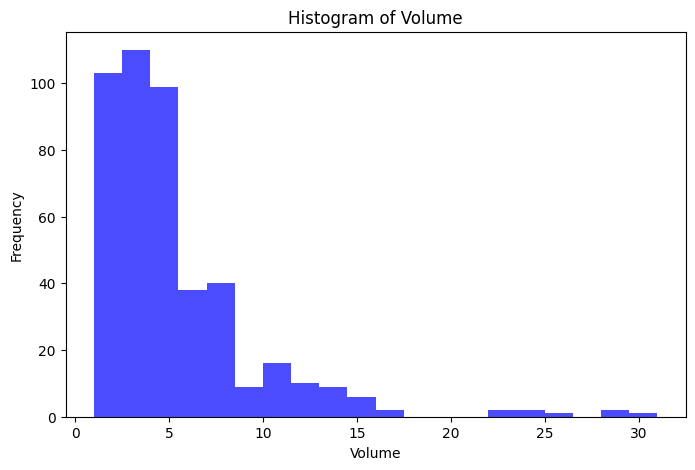

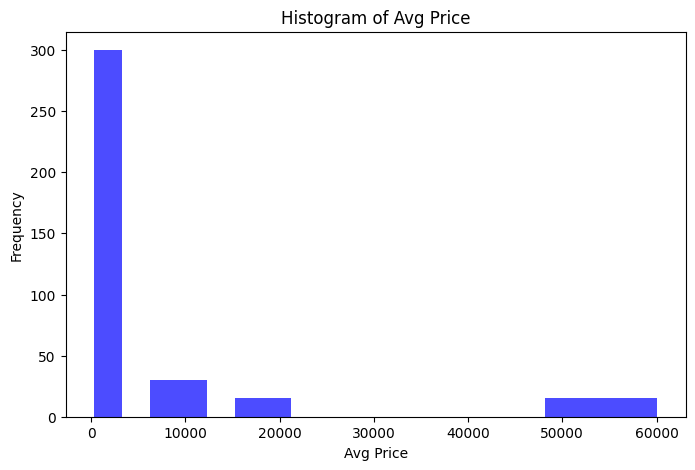

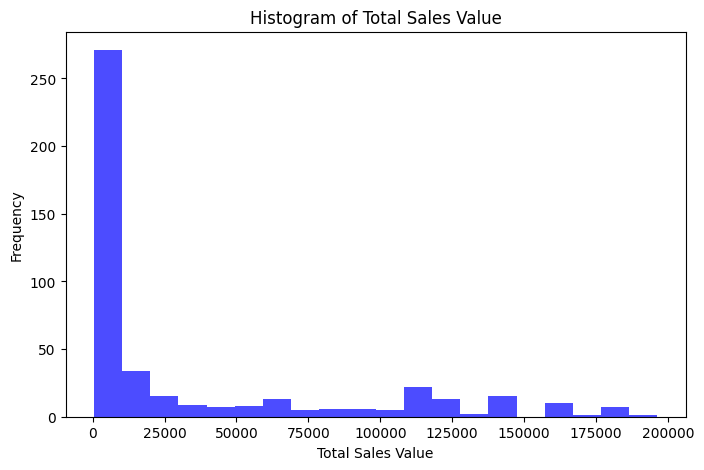

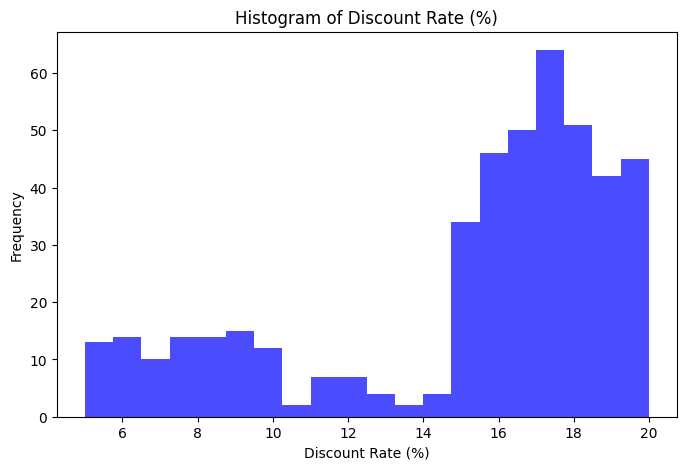

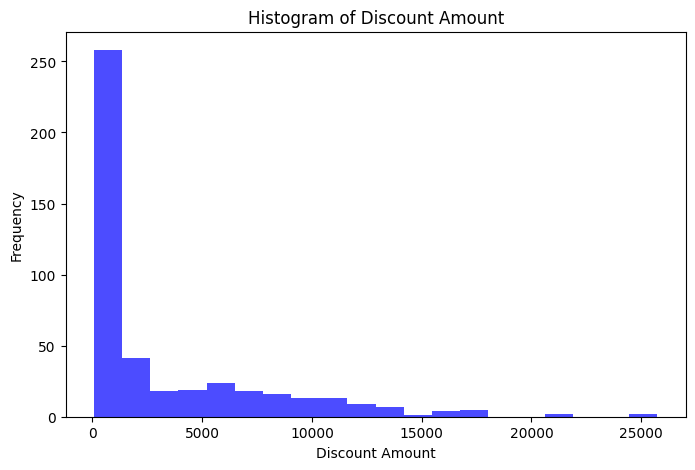

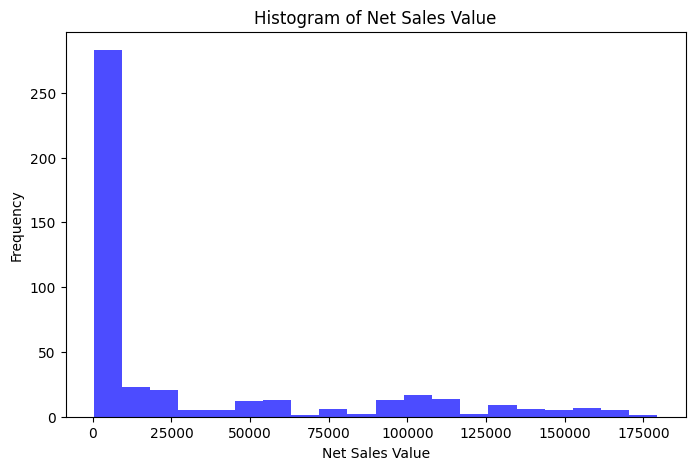

In [12]:
# Data Visualization
# Histograms for Numerical Columns
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    plt.hist(data[col], bins=20, color='blue', alpha=0.7)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

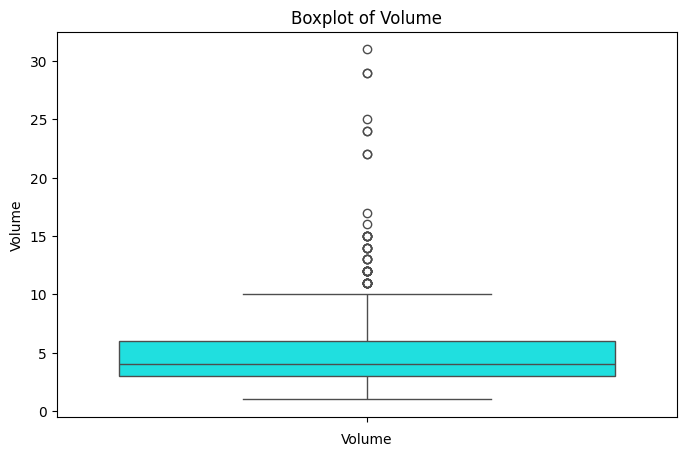

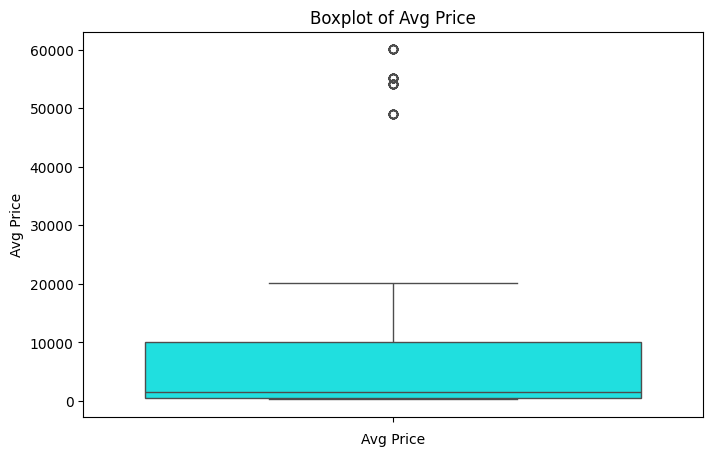

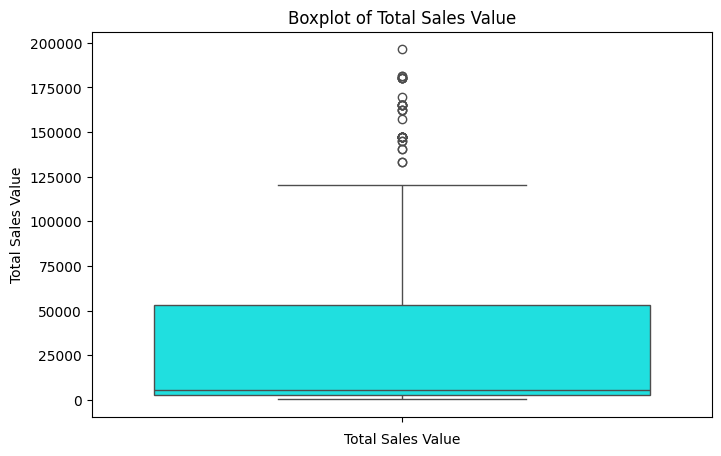

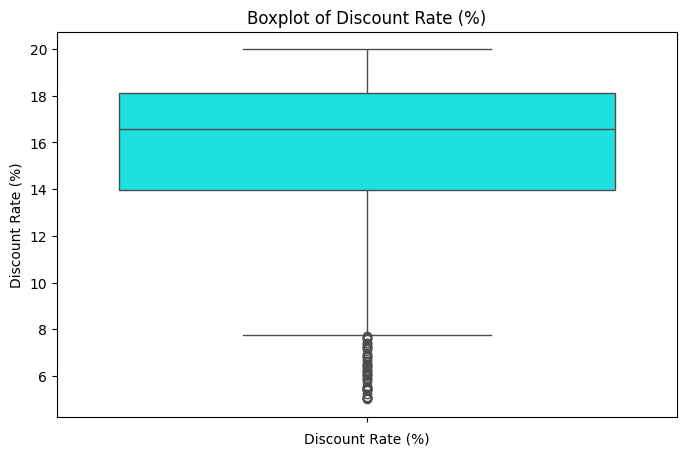

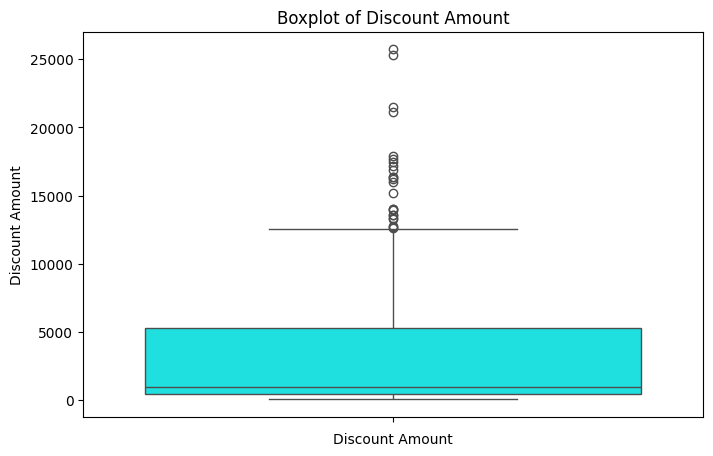

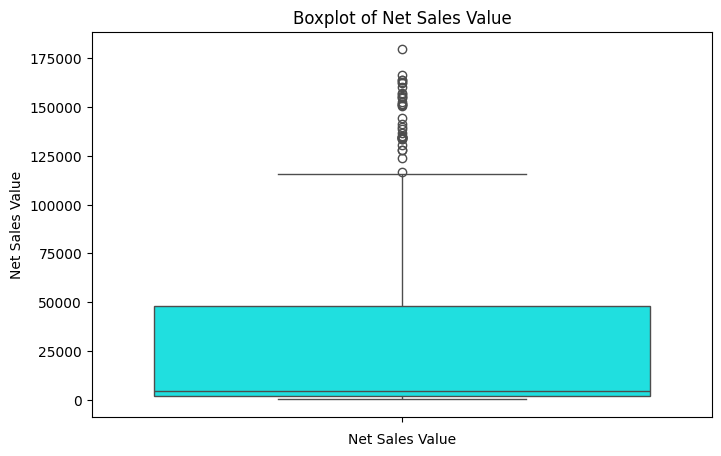

In [13]:
# Boxplots for Numerical Columns
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data[col], color='cyan')
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

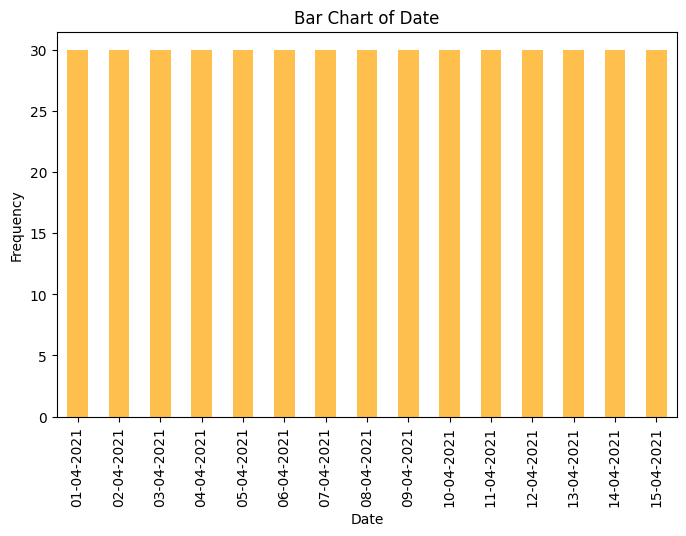

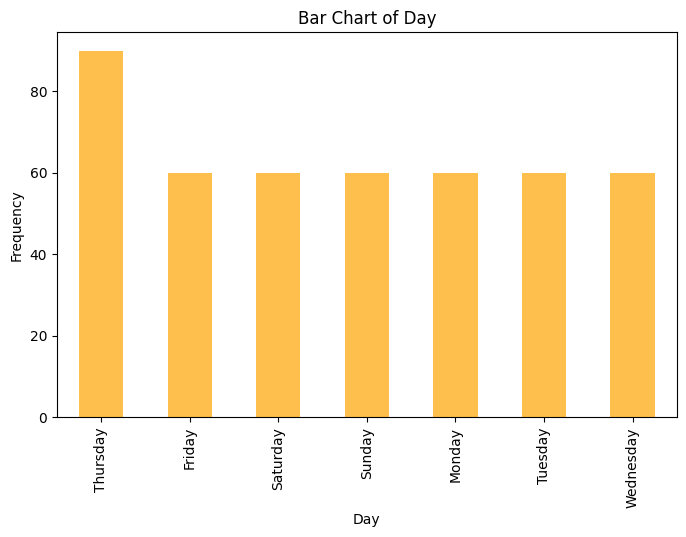

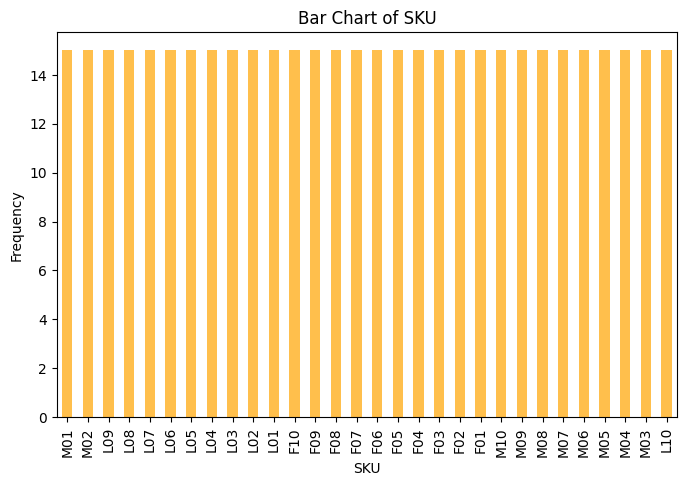

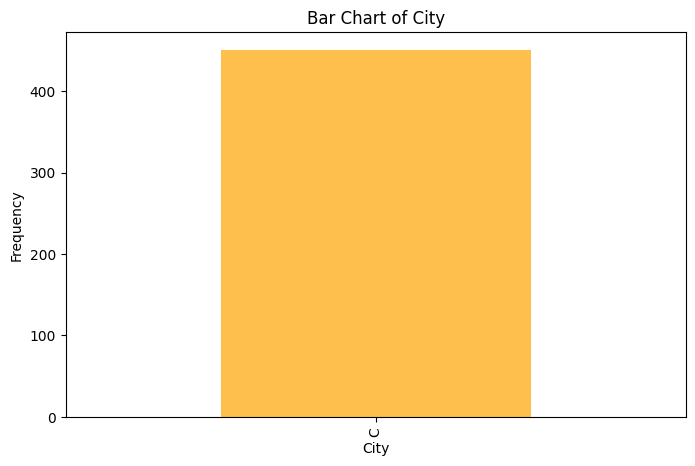

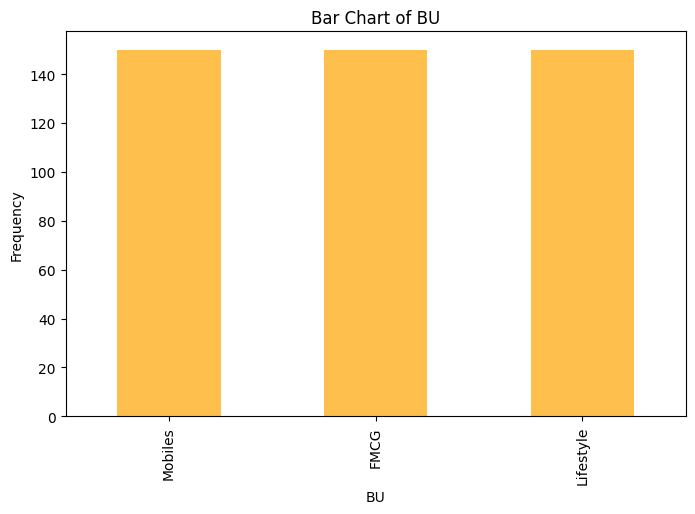

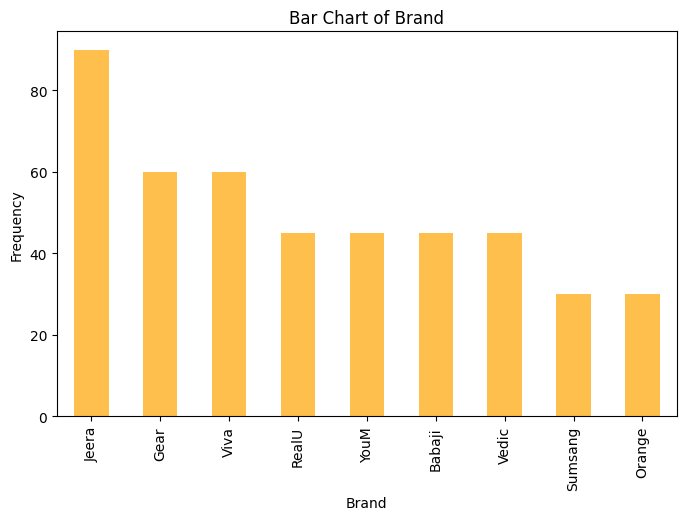

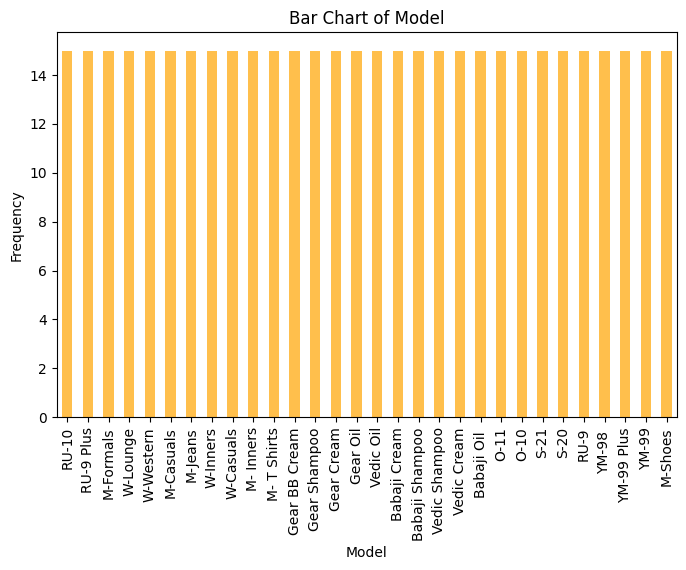

In [14]:
# Bar Chart Analysis for Categorical Columns
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    data[col].value_counts().plot(kind='bar', color='orange', alpha=0.7)
    plt.title(f"Bar Chart of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [15]:
# Standardization of Numerical Variables
from scipy.stats import zscore

standardized_data = data.copy()
for col in numerical_cols:
    standardized_data[col] = zscore(data[col])

In [16]:
print("\nStandardized Data (First 5 Rows):")
print(standardized_data[numerical_cols].head())


Standardized Data (First 5 Rows):
     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.350029   0.091173           2.925721          -0.830289         3.952816   
1  1.167129  -0.019570           1.330995          -0.852661         1.849014   
2  0.457388   0.312659           1.562775          -1.351631         1.622995   
3  0.220808   0.534146           1.719276          -1.949723         1.113807   
4 -0.488932  -0.130313          -0.188452           0.673739         0.227852   

   Net Sales Value  
0         2.804756  
1         1.271026  
2         1.545675  
3         1.765810  
4        -0.227595  


Text(0.5, 1.0, 'Before Standardization: Volume')

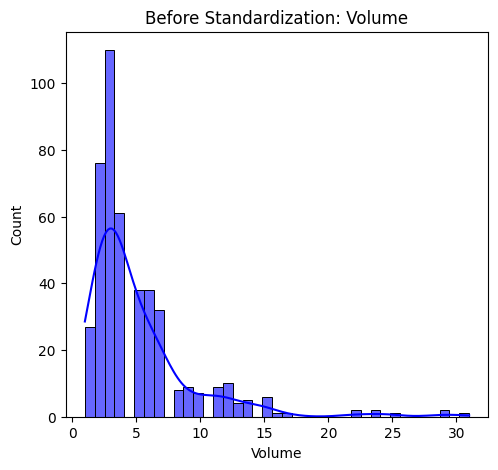

In [17]:

# Before and After Comparison for a Numerical Column
example_col = numerical_cols[0]  # Use the first numerical column as an example
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data[example_col], kde=True, color='blue', alpha=0.6)
plt.title(f"Before Standardization: {example_col}")

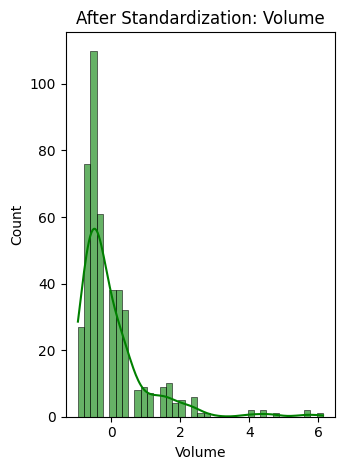

In [19]:
plt.subplot(1, 2, 2)
sns.histplot(standardized_data[example_col], kde=True, color='green', alpha=0.6)
plt.title(f"After Standardization: {example_col}")
plt.tight_layout()
plt.show()

In [20]:
# Conversion of Categorical Data into Dummy Variables
one_hot_encoded_data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

print("\nOne-Hot Encoded Data (First 5 Rows):")
print(one_hot_encoded_data.head())


One-Hot Encoded Data (First 5 Rows):
   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  \
0    160346.501180            False            False            False   
1     89323.897039            False            False            False   
2    102042.089843            False            False            False   
3    112235.925298            False            False            False   
4     19927.053770            False            False            False   

   Date_05-04-2021  ...  Model_Vedic Cream  Mode

In [21]:
# Conclusion
print("\nSummary:")
print(f"Numerical columns were standardized using z-score normalization. One-hot encoding was applied to {len(categorical_cols)} categorical columns, resulting in a dataset ready for machine learning models.")



Summary:
Numerical columns were standardized using z-score normalization. One-hot encoding was applied to 7 categorical columns, resulting in a dataset ready for machine learning models.
